In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import maup
from zipfile import ZipFile
import numpy as np
import os
import shutil
import shapely.geometry

# US House

## Final File - Load

In [5]:
pwd

'/Users/lilyfalk/sandbox/pdv-va'

In [6]:
final = gpd.read_file('./vest_va_2016/va_2016_ushouse/va_2016_ushouse.shp')
final

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G16HORDEM,G16HORREP,G16HORIND,G16HORWRI,geometry
0,001,Accomack County,000101,Chincoteague,2,453,1319,0,2,"POLYGON Z ((-75.42507 37.89957 0.00000, -75.42..."
1,001,Accomack County,000201,Atlantic,2,144,643,0,2,"POLYGON Z ((-75.59978 37.87664 0.00000, -75.59..."
2,001,Accomack County,000202,Greenbackville,2,298,799,0,1,"POLYGON Z ((-75.49919 37.93416 0.00000, -75.49..."
3,001,Accomack County,000301,New Church,2,723,670,0,0,"POLYGON Z ((-75.64987 37.92702 0.00000, -75.64..."
4,001,Accomack County,000401,Bloxom,2,124,395,0,0,"POLYGON Z ((-75.71556 37.87513 0.00000, -75.71..."
...,...,...,...,...,...,...,...,...,...,...
2453,195,Wise County,000301,Big Stone Gap,9,479,1263,55,5,"POLYGON Z ((-82.77275 36.84962 0.00000, -82.77..."
2454,095,James City County,000202,Jamestown B (CD 2),2,8,0,0,0,"POLYGON Z ((-76.73414 37.28607 0.00000, -76.73..."
2455,095,James City County,000202,Jamestown B (CD 1),1,1242,1258,103,8,"POLYGON Z ((-76.73272 37.28612 0.00000, -76.73..."
2456,095,James City County,000504,Roberts D (CD 1),1,13,15,1,0,"POLYGON Z ((-76.74957 37.23549 0.00000, -76.74..."


# Election Results: US House

## Read in election results and append since files split accross districts

In [7]:
pwd

'/Users/lilyfalk/sandbox/pdv-va'

In [8]:
district = [str(1), str(2), str(3), str(4), str(5), str(6), str(7), str(8), str(9), str(10), str(11)]

In [9]:
#Load in all results, check party by district to match for this dictionary, then reload in and rename in code
candidate_to_party_dict = {'Robert Joseph Wittman': 'G16HORREP',
                           'Matthew Dew Rowe': 'G16HORDEM', 
                           'Glenda Gail Parker': 'G16HORIND',
                           'All Others': 'G16HORWRI', 
                           'Scott William Taylor': 'G16HORREP',
                           'Shaun D. Brown': 'G16HORDEM',
                           'Robert Cortez Scott': 'G16HORDEM',
                           'Martin L. Williams': 'G16HORREP',
                           'A. Donald McEachin': 'G16HORDEM',
                           'Michael L. Wade': 'G16HORREP',
                           'Tom A. Garrett, Jr': 'G16HORREP',
                           'Jane D. Dittmar': 'G16HORDEM', 
                           'Robert William Goodlatte': 'G16HORREP',
                           'Kai Degner': 'G16HORDEM',
                           'David A. Brat': 'G16HORREP',
                           'Eileen Mcneil Bedell': 'G16HORDEM',
                           'Charles Alan Hernick': 'G16HORREP',
                           'Donald Sternoff Beyer, Jr.': 'G16HORDEM', 
                           'Julio Gracia': 'G16HORIND',
                           'Howard Morgan Griffith': 'G16HORREP',
                           'Derek W. Kitts': 'G16HORDEM', 
                           'Janice Allen Boyd': 'G16HORIND',
                           'Barbara Jean Comstock': 'G16HORREP',
                           'Luann L. Bennett': 'G16HORDEM',
                           'Gerald Edward Connolly': 'G16HORDEM'}

In [10]:
elections_by_district = []
for i in district:
    ref = './vest_va_2016/us_house_results_by_district_2016/'
    file_name = ref + 'Virginia_Elections_Database__2016_U_S_House_General_Election_District_'+ i +'_including_precincts.csv'
    results = pd.read_csv(file_name)
    print(i, ' added to list')
    results['CON_DIST'] = i
    for col in results.columns:
        if col in candidate_to_party_dict.keys():
            col_new_name = candidate_to_party_dict.get(col)
            results = results.rename(columns = {col:col_new_name})
    elections_by_district.append(results)

1  added to list
2  added to list
3  added to list
4  added to list
5  added to list
6  added to list
7  added to list
8  added to list
9  added to list
10  added to list
11  added to list


In [11]:
df = pd.concat(elections_by_district, axis = 0)
df = df.reset_index()

In [12]:
df.head()

,index,County/City,Ward,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,Total Votes Cast,CON_DIST
0,0,NaN,NaN,NaN,Republican,Democratic,Independent,NaN,NaN,1
1,1,Caroline County,-,101 - Bowling Green,739,372,32,3,"1,146",1
2,2,Caroline County,-,102 - Sparta,556,307,26,4,893,1
3,3,Caroline County,-,201 - North Madison,531,450,25,2,"1,008",1
4,4,Caroline County,-,202 - South Madison,750,451,48,5,"1,254",1


In [13]:
df = df[df['County/City'] != 'TOTALS']
df['LOCALITY'] = df['County/City']
df = df.iloc[1:]
df = df.drop(['County/City', 'Ward', 'Total Votes Cast'], axis = 1)
df = df.fillna(value = 0)
df = df[(df['G16HORDEM'] != 'Democratic') & (df['G16HORREP'] != 'Republican') & (df['G16HORIND'] != 'Independent')]
county_dict = pd.Series(final['COUNTYFP'].values, index = final['LOCALITY']).to_dict()
df['COUNTYFP'] = df['LOCALITY'].map(county_dict)

df['G16HORDEM'] = df['G16HORDEM'].map(lambda x: str(x).replace(',', ''))
df['G16HORREP'] = df['G16HORREP'].map(lambda x: str(x).replace(',', ''))
df['G16HORIND'] = df['G16HORIND'].map(lambda x: str(x).replace(',', ''))
df['G16HORWRI'] = df['G16HORWRI'].map(lambda x: str(x).replace(',', ''))

df['G16HORDEM'] = df['G16HORDEM'].astype(str).astype(float).astype(int)
df['G16HORREP'] = df['G16HORREP'].astype(str).astype(float).astype(int)
df['G16HORIND'] = df['G16HORIND'].astype(str).astype(float).astype(int)
df['G16HORWRI'] = df['G16HORWRI'].astype(str).astype(float).astype(int)

df['CON_DIST'] = df['CON_DIST'].astype(str)

In [14]:
df.head()

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP
1,1,101 - Bowling Green,739,372,32,3,1,Caroline County,033
2,2,102 - Sparta,556,307,26,4,1,Caroline County,033
3,3,201 - North Madison,531,450,25,2,1,Caroline County,033
4,4,202 - South Madison,750,451,48,5,1,Caroline County,033
5,5,301 - Port Royal,387,186,21,2,1,Caroline County,033


# Re allocate absentee votes

### cd with county to better reallocate absentee

In [15]:
cd_abs_prov_prec = df[((df['Pct'].map(lambda x: 'Absentee' in str(x))) &(df['Pct'].map(lambda x: 'CD' in str(x)))) | ((df['Pct'].map(lambda x: 'Provisional' in str(x))) & (df['Pct'].map(lambda x: 'CD' in str(x))))]

In [16]:
county_with_cd_nec_list = list(cd_abs_prov_prec['COUNTYFP'])

In [17]:
df['Pct'].str.slice(start = -5)[df['COUNTYFP'].isin(county_with_cd_nec_list)].value_counts()

Series([], Name: Pct, dtype: int64)

In [18]:
df[(df['Pct'].map(lambda x: 'Absentee' in str(x))) | (df['Pct'].map(lambda x: 'Provisional' in str(x)))]

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP
13,13,Ab - Central Absentee Precinct,669,556,58,5,1,Caroline County,033
14,14,Provisional,5,6,0,0,1,Caroline County,033
19,19,Ab - Central Absentee Precinct,368,228,21,0,1,Essex County,057
20,20,Provisional,0,1,0,0,1,Essex County,057
25,25,Ab - Central Absentee Precinct,362,193,23,1,1,Fauquier County,061
...,...,...,...,...,...,...,...,...,...
2723,117,Provisional,0,194,0,21,11,Fairfax County,059
2730,124,Ab - Central Absentee Precinct,0,1891,0,207,11,Fairfax City,600
2731,125,Provisional,0,6,0,1,11,Fairfax City,600
2771,165,Ab - Central Absentee Precinct,0,14610,0,1181,11,Prince William County,153


In [19]:
(df['COUNTYFP'] + '-' + df['CON_DIST']).value_counts()

059-11    117
810-2     100
107-10     95
059-8      82
087-7      69
         ... 
115-1       5
830-2       4
678-6       3
530-6       3
720-9       2
Length: 149, dtype: int64

In [20]:
df['countyfp_cd'] = df['COUNTYFP'] + '-' + df['CON_DIST']

### Actual Reallocation

In [21]:
def get_absentee_frac(prec_tot, county_tot, absentee_tot):
    '''
    Keyword arguments: (put inputs to funtions and say what they should be)
    precinct vote total for given candidate (int)
    county vote total for given candidate, absentee and provisional votes not included (int)
    absentee vote total for county for given candidate (int)
    '''
    if county_tot != 0:
        prec_frac = prec_tot/county_tot
        absentee_frac = prec_frac*absentee_tot
    else:
        absentee_frac = 0
    return absentee_frac

In [22]:
absentee_and_prov = df[(df['Pct'].map(lambda x: 'Absentee' in str(x))) | (df['Pct'].map(lambda x: 'Provisional' in str(x)))]
groupby_absentee_and_prov_tot = absentee_and_prov.groupby(['countyfp_cd']).sum()

In [23]:
groupby_county_df_tot = df.groupby(['countyfp_cd']).sum()
df_no_absent_or_provisional = df[(df['Pct'].map(lambda x: 'Absentee' not in str(x))) & (df['Pct'].map(lambda x: 'Provisional' not in str(x)))
                                & (df['LOCALITY'] != 'TOTALS')]
groupby_county_tot_no_absentee = df_no_absent_or_provisional.groupby('countyfp_cd').sum()

In [24]:
df_with_absentee_reallocated = df_no_absent_or_provisional.copy()
sum_allocated = 0
prec_sum_w_ab = 0
for index, precinct_total_row_by_candidate in df_no_absent_or_provisional.iterrows():
    #print(precinct_total_row_by_candidate)
    county_fips = precinct_total_row_by_candidate['countyfp_cd']
    county_total_row_by_candidate_no_absentee = groupby_county_tot_no_absentee.loc[county_fips]
    county_absentee_and_provisional_by_candidate = groupby_absentee_and_prov_tot.loc[county_fips]
    #print(precinct_total_row_by_candidate, county_total_row_by_candidate_no_absentee, county_absentee_and_provisional_by_candidate)
    for candidate, votes in county_total_row_by_candidate_no_absentee.to_dict().items():
        prec_tot = precinct_total_row_by_candidate[candidate]
        #print('precinct total: ', prec_tot)
        county_tot = votes
        #print('county total: ', county_tot)
        absentee_tot = county_absentee_and_provisional_by_candidate[candidate]
        #print('absentee total: ', absentee_tot)
        absentee_frac = get_absentee_frac(prec_tot, county_tot, absentee_tot)
        #print('absentee votes to allocate to precinct: ', absentee_frac)
        prec_with_absentee_allocation = prec_tot + absentee_frac
        #print('new precinct total: ', prec_with_absentee_allocation)
       #print(df_with_absentee_reallocated[['G18HORREP', 'G18HORDEM', 'G18HORWRI', 'G18HORLIB']].sum().sum())
        df_with_absentee_reallocated.loc[index, candidate] = round(prec_with_absentee_allocation) #index is row, candidate is column

        #print(df_with_absentee_reallocated[['G18HORREP', 'G18HORDEM', 'G18HORWRI', 'G18HORLIB']].sum().sum())
        sum_allocated = sum_allocated + absentee_frac
        prec_sum_w_ab = prec_sum_w_ab + prec_with_absentee_allocation
        ##So, the number of absentee reallocated looks right... must be a problem with the sum of the prec_tot and absentee_frac?
#print(sum_allocated)
#print(prec_tot)
print(prec_sum_w_ab)
df_with_absentee_reallocated.loc[index, candidate]
#df_with_absentee_reallocated.loc[index, candidate]

4153798.0000000196


165.0

## Check column sums

In [25]:
groupby_df_with_absentee_reallocated = df_with_absentee_reallocated.groupby('COUNTYFP').sum()

In [26]:
groupby_county_final = final.groupby(['COUNTYFP']).sum()

In [27]:
groupby_county_final.sum().sum()

3782248

In [28]:
df_absentee_reallocate_with_final = pd.merge(groupby_df_with_absentee_reallocated, groupby_county_final, on = 'COUNTYFP', how = 'inner', suffixes = ('_x', '_y'))

In [29]:
df.columns

Index(['index', 'Pct', 'G16HORREP', 'G16HORDEM', 'G16HORIND', 'G16HORWRI',
       'CON_DIST', 'LOCALITY', 'COUNTYFP', 'countyfp_cd'],
      dtype='object')

In [30]:
column_list = ['G16HORREP', 'G16HORDEM','G16HORIND', 'G16HORWRI']

In [31]:
def sum_checker(df, column_list):
    list_max = 0
    for i in column_list:
        left_sum = df[i+'_x'].sum()
        right_sum = df[i+'_y'].sum()
        if (left_sum == right_sum):
            print('column: ', i, ' have the same sums')
        
        else:
            diff = abs(left_sum - right_sum)
            percent = abs(left_sum - right_sum)/left_sum
            print('column: ', i)
            print('RDH sum is ', str(left_sum))
            print('Partner sum is ', str(right_sum))
            print('their (absolute) difference is ', str(diff))
            print('As a percentage of DF1 this is ', str(round(percent*100,5)) + '%')
            if (percent>list_max):
                list_max = percent
            print('')
    print('The max difference (as a percent of the total of on DF column is: ', str(round(list_max,5)))

In [32]:
sum_checker(df_absentee_reallocate_with_final, column_list)

column:  G16HORREP
RDH sum is  1843001.0
Partner sum is  1843010
their (absolute) difference is  9.0
As a percentage of DF1 this is  0.00049%

column:  G16HORDEM
RDH sum is  1859424.0
Partner sum is  1859426
their (absolute) difference is  2.0
As a percentage of DF1 this is  0.00011%

column:  G16HORIND
RDH sum is  36560.0
Partner sum is  36580
their (absolute) difference is  20.0
As a percentage of DF1 this is  0.0547%

column:  G16HORWRI
RDH sum is  43106.0
Partner sum is  43232
their (absolute) difference is  126.0
As a percentage of DF1 this is  0.2923%

The max difference (as a percent of the total of on DF column is:  0.00292


# Shapefile

In [33]:
pwd

'/Users/lilyfalk/sandbox/pdv-va'

In [34]:
county_fips = []
for directory in os.listdir('./vest_va_2016/census_shps_by_county_all_unzip/'):
    if not directory[0] == '.':
        county_fips.append(directory[-5:])

In [35]:
proj = final.crs

In [36]:
county_vtds = []

for i in county_fips: #i dont have fips_codes file
    ref = './vest_va_2016/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    vtd_ref = ref + i + '/PVS_19_v2_vtd_' + i + '.shp' 
    vtd_shp = gpd.read_file(vtd_ref)
    print(i, ' added to list')
    county_vtds.append(vtd_shp)

51580  added to list
51117  added to list
51121  added to list
51119  added to list
51770  added to list
51181  added to list
51175  added to list
51143  added to list
51520  added to list
51127  added to list
51740  added to list
51111  added to list
51145  added to list
51510  added to list
51187  added to list
51173  added to list
51001  added to list
51650  added to list
51037  added to list
51063  added to list
51097  added to list
51099  added to list
51009  added to list
51660  added to list
51036  added to list
51031  added to list
51007  added to list
51053  added to list
51065  added to list
51091  added to list
51047  added to list
51071  added to list
51085  added to list
51049  added to list
51620  added to list
51680  added to list
51025  added to list
51013  added to list
51810  added to list
51077  added to list
51083  added to list
51079  added to list
51610  added to list
51041  added to list
51015  added to list
51023  added to list
51820  added to list
51169  added 

In [37]:
global shp
shp = gpd.GeoDataFrame(pd.concat(county_vtds, axis = 0) , crs = proj) 

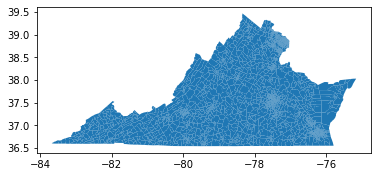

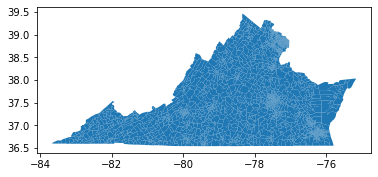

In [38]:
shp.plot()
final.plot()

In [39]:
shp['unique_id'] = shp['COUNTYFP'] + shp['VTDST'].str.slice(start = 3)

### **Load in cd shp to enable splits later on**

In [40]:
county_cd = []

for i in county_fips: #i dont have fips_codes file
    ref = './vest_va_2016/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    cd_ref = ref + i + '/PVS_19_v2_cd_' + i + '.shp' 
    cd_shp = gpd.read_file(cd_ref)
    print(i, ' added to list')
    county_cd.append(cd_shp)

51580  added to list
51117  added to list
51121  added to list
51119  added to list
51770  added to list
51181  added to list
51175  added to list
51143  added to list
51520  added to list
51127  added to list
51740  added to list
51111  added to list
51145  added to list
51510  added to list
51187  added to list
51173  added to list
51001  added to list
51650  added to list
51037  added to list
51063  added to list
51097  added to list
51099  added to list
51009  added to list
51660  added to list
51036  added to list
51031  added to list
51007  added to list
51053  added to list
51065  added to list
51091  added to list
51047  added to list
51071  added to list
51085  added to list
51049  added to list
51620  added to list
51680  added to list
51025  added to list
51013  added to list
51810  added to list
51077  added to list
51083  added to list
51079  added to list
51610  added to list
51041  added to list
51015  added to list
51023  added to list
51820  added to list
51169  added 

In [41]:
global cd
cd = gpd.GeoDataFrame(pd.concat(county_cd, axis = 0) , crs = proj) 

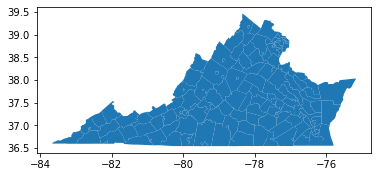

In [42]:
cd.plot()

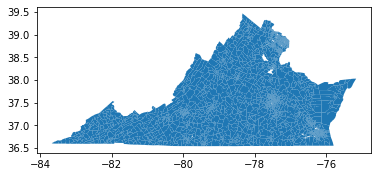

In [43]:
overlay = gpd.overlay(cd, shp, how = 'intersection', make_valid = True, keep_geom_type = True)
overlay.plot()

In [56]:
shp['unique_id'].shape

(2462,)

# Unique ID Across Files

In [79]:
shp.shape

(2462, 17)

In [80]:
final.shape

(2458, 13)

In [81]:
df_with_absentee_reallocated.shape

(2461, 14)

In [82]:
(final['COUNTYFP']+ final['VTDST'].str.slice(start = 3)).nunique()

2435

In [83]:
len(set(final['COUNTYFP']+ final['VTDST'].str.slice(start = 3)) - set(shp['COUNTYFP'] + shp['VTDST'].str.slice(start = 3)))

24

In [84]:
(df_with_absentee_reallocated['COUNTYFP'] + df_with_absentee_reallocated['Pct'].str.slice(stop = 3)).nunique()

2434

In [85]:
len(set((df_with_absentee_reallocated['COUNTYFP'] + df_with_absentee_reallocated['Pct'].str.slice(stop = 3))) - set(final['COUNTYFP']+ final['VTDST'].str.slice(start = 3)))

360

In [86]:
len(set(final['COUNTYFP']+ final['VTDST'].str.slice(start = 3)) - set((df_with_absentee_reallocated['COUNTYFP'] + df_with_absentee_reallocated['Pct'].str.slice(stop = 3))))

361

In [87]:
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated.Pct.str.slice(stop = 3)

In [88]:
#Make election df format match VEST's 
def vtdst_changer(vtdst):
    if (vtdst[1:3] == ' -'):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[1:3] == '- '):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[-1:] == ' '):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    elif (vtdst[-1:] == '-'):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    else:
        return vtdst

In [89]:
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated['vtdst'].apply(vtdst_changer)
df_with_absentee_reallocated[df_with_absentee_reallocated['vtdst'].str.slice(start = -1) == '-'] 

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,vtdst,unique_id,unique_id_1,unique_id_2


In [90]:
df_with_absentee_reallocated['unique_id'] = df_with_absentee_reallocated['COUNTYFP'] + df_with_absentee_reallocated['vtdst']

In [91]:
set(final['COUNTYFP']+ final['VTDST'].str.slice(start = 3)) - set((df_with_absentee_reallocated['unique_id']))

{'059700'}

In [92]:
final['unique_id'] = final['COUNTYFP']+ final['VTDST'].str.slice(start = 3)

In [93]:
final['unique_id'].nunique()

2435

In [94]:
df_with_absentee_reallocated['unique_id_1'] = df_with_absentee_reallocated['unique_id'] + '-' + df_with_absentee_reallocated['CON_DIST']
final['unique_id_1'] = final['unique_id'] + '-' + final['CON_DIST']

In [95]:
final['unique_id_1'].nunique()

2458

In [96]:
df_with_absentee_reallocated['unique_id_1'].nunique()

2461

In [97]:
set(final['unique_id_1']) - set(df_with_absentee_reallocated['unique_id_1'])

{'059700-11'}

In [98]:
set(df_with_absentee_reallocated['unique_id_1']) - set(final['unique_id_1'])

{'059925-11', '550019-3', '550045-3', '800403-3'}

In [99]:
len(set(shp['unique_id']) - set(final['unique_id']))

50

In [100]:
len(set(final['unique_id']) - set(shp['unique_id']))

24

In [101]:
df_id_count = df_with_absentee_reallocated['unique_id'].value_counts()
df_double_list = df_id_count[df_id_count > 1].index
final_id_count = final.unique_id.value_counts()
final_double_list = final_id_count[final_id_count > 1].index
print('Double in df, not in final: ', set(df_double_list) - set(final_double_list))
print('Double in final, not in df: ',set(final_double_list) - set(df_double_list))
print(df_double_list)

Double in df, not in final:  {'800403', '550045', '059925', '550019'}
Double in final, not in df:  set()
Index(['550019', '800403', '089304', '095202', '177103', '153312', '800404',
       '550045', '177703', '089505', '710104', '095504', '800602', '177402',
       '800504', '059925', '650215', '800302', '177704', '710101', '177702',
       '153112', '059513', '153210', '550020', '153609', '153110'],
      dtype='object')


In [102]:
df_with_absentee_reallocated[df_with_absentee_reallocated.unique_id.isin(set(df_double_list) - set(final_double_list))]

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,vtdst,unique_id,unique_id_1,unique_id_2
467,12.0,19 - Jolliff,0.0,0.0,0.0,0.0,3,Chesapeake City,550,550-3,019,550019,550019-3,550019
485,32.0,45 - Sunray II,0.0,0.0,0.0,0.0,3,Chesapeake City,550,550-3,045,550045,550045-3,550045
667,234.0,403 - Southside,0.0,0.0,0.0,0.0,3,Suffolk City,800,800-3,403,800403,800403-3,800403
693,16.0,19 - Jolliff,973.0,393.0,0.0,9.0,4,Chesapeake City,550,550-4,019,550019,550019-4,550019
703,27.0,45 - Sunray II,262.0,412.0,0.0,6.0,4,Chesapeake City,550,550-4,045,550045,550045-4,550045
924,284.0,403 - Southside,98.0,742.0,0.0,0.0,4,Suffolk City,800,800-4,403,800403,800403-4,800403
2441,57.0,925 - Old Mill,702.0,926.0,0.0,5.0,10,Fairfax County,059,059-10,925,059925,059925-10,059925
2719,117.0,925 - Old Mill,0.0,0.0,0.0,0.0,11,Fairfax County,059,059-11,925,059925,059925-11,059925


In [103]:
df_with_absentee_reallocated[df_with_absentee_reallocated['unique_id'] == '800403']

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,vtdst,unique_id,unique_id_1,unique_id_2
667,234.0,403 - Southside,0.0,0.0,0.0,0.0,3,Suffolk City,800,800-3,403,800403,800403-3,800403
924,284.0,403 - Southside,98.0,742.0,0.0,0.0,4,Suffolk City,800,800-4,403,800403,800403-4,800403


In [104]:
final[(final['COUNTYFP'] == '800') &  (final['PRECINCT'].str.contains('SOUTH'))] 

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G16HORDEM,G16HORREP,G16HORIND,G16HORWRI,geometry,unique_id,unique_id_1,unique_id_2
2061,800,Suffolk City,000403,SOUTHSIDE,4,742,98,0,0,"POLYGON Z ((-76.62006 36.71008 0.00000, -76.62...",800403,800403-4,800403


In [105]:
df_with_absentee_reallocated[df_with_absentee_reallocated['unique_id'] == '550045']

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,vtdst,unique_id,unique_id_1,unique_id_2
485,32.0,45 - Sunray II,0.0,0.0,0.0,0.0,3,Chesapeake City,550,550-3,045,550045,550045-3,550045
703,27.0,45 - Sunray II,262.0,412.0,0.0,6.0,4,Chesapeake City,550,550-4,045,550045,550045-4,550045


In [106]:
final[(final['COUNTYFP'] == '550') &  (final['PRECINCT'].str.contains('C'))] 

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G16HORDEM,G16HORREP,G16HORIND,G16HORWRI,geometry,unique_id,unique_id_1,unique_id_2
1655,550,Chesapeake City,000003,Camelot,3,2107,158,0,4,"POLYGON Z ((-76.36447 36.77827 0.00000, -76.36...",550003,550003-3,550003
1658,550,Chesapeake City,000036,Great Bridge Baptist Church,4,354,710,0,6,"POLYGON Z ((-76.26309 36.66071 0.00000, -76.26...",550036,550036-4,550036
1659,550,Chesapeake City,000043,Pleasant Crossing,4,387,1215,0,3,"POLYGON Z ((-76.23986 36.72091 0.00000, -76.23...",550043,550043-4,550043
1661,550,Chesapeake City,000004,Churchland,3,490,1000,0,1,"POLYGON Z ((-76.40935 36.83620 0.00000, -76.40...",550004,550004-3,550004
1665,550,Chesapeake City,000005,Crestwood,3,1550,216,0,4,"POLYGON Z ((-76.29859 36.76704 0.00000, -76.29...",550005,550005-3,550005
1666,550,Chesapeake City,000006,Deep Creek,4,1573,1755,0,13,"POLYGON Z ((-76.49148 36.55072 0.00000, -76.48...",550006,550006-4,550006
1667,550,Chesapeake City,000017,Indian Creek,4,285,1130,0,6,"POLYGON Z ((-76.21181 36.61671 0.00000, -76.21...",550017,550017-4,550017
1677,550,Chesapeake City,000038,Bailey Creek,3,496,1186,0,3,"POLYGON Z ((-76.44289 36.81667 0.00000, -76.44...",550038,550038-3,550038
1680,550,Chesapeake City,000031,Carver School,3,1660,296,0,7,"POLYGON Z ((-76.28548 36.77660 0.00000, -76.28...",550031,550031-3,550031
1700,550,Chesapeake City,000051,Coopers Way,4,497,1812,0,6,"POLYGON Z ((-76.23300 36.69624 0.00000, -76.23...",550051,550051-4,550051


In [107]:
df_with_absentee_reallocated[df_with_absentee_reallocated['unique_id'] == '059925']

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,vtdst,unique_id,unique_id_1,unique_id_2
2441,57.0,925 - Old Mill,702.0,926.0,0.0,5.0,10,Fairfax County,059,059-10,925,059925,059925-10,059925
2719,117.0,925 - Old Mill,0.0,0.0,0.0,0.0,11,Fairfax County,059,059-11,925,059925,059925-11,059925


In [108]:
df_with_absentee_reallocated[(df_with_absentee_reallocated['COUNTYFP'] == '059') & (df_with_absentee_reallocated['Pct'].str.contains('Fair'))]

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,vtdst,unique_id,unique_id_1,unique_id_2
1923,107.0,413 - Fairfield,221.0,1451.0,115.0,5.0,8,Fairfax County,059,059-8,413,059413,059413-8,059413
2416,30.0,805 - Fairfax Station,742.0,592.0,0.0,3.0,10,Fairfax County,059,059-10,805,059805,059805-10,059805
2608,2.0,105 - Fairview,0.0,2452.0,0.0,562.0,11,Fairfax County,059,059-11,105,059105,059105-11,059105
2709,107.0,843 - Fair Lakes,0.0,1724.0,0.0,214.0,11,Fairfax County,059,059-11,843,059843,059843-11,059843
2712,110.0,848 - Fair Oaks,0.0,1832.0,0.0,153.0,11,Fairfax County,059,059-11,848,059848,059848-11,059848


In [109]:
final[(final['COUNTYFP'] == '059') &  (final['PRECINCT'].str.contains('Fair'))] 

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G16HORDEM,G16HORREP,G16HORIND,G16HORWRI,geometry,unique_id,unique_id_1,unique_id_2
415,059,Fairfax County,000105,Fairview,11,2453,0,0,563,"POLYGON Z ((-77.32665 38.78832 0.00000, -77.32...",059105,059105-11,059105
504,059,Fairfax County,000413,Fairfield,8,1451,221,115,5,"POLYGON Z ((-77.10620 38.74253 0.00000, -77.10...",059413,059413-8,059413
584,059,Fairfax County,000700,Fairfax Court,11,0,0,0,0,"POLYGON Z ((-77.31648 38.84615 0.00000, -77.31...",059700,059700-11,059700
598,059,Fairfax County,000805,Fairfax Station,10,592,742,0,3,"POLYGON Z ((-77.36234 38.78983 0.00000, -77.36...",059805,059805-10,059805
613,059,Fairfax County,000843,Fair Lakes,11,1725,0,0,214,"POLYGON Z ((-77.40756 38.86820 0.00000, -77.40...",059843,059843-11,059843
618,059,Fairfax County,000848,Fair Oaks,11,1832,0,0,153,"POLYGON Z ((-77.40483 38.84011 0.00000, -77.40...",059848,059848-11,059848


In [110]:
df_with_absentee_reallocated[df_with_absentee_reallocated['unique_id'] == '550019']

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,vtdst,unique_id,unique_id_1,unique_id_2
467,12.0,19 - Jolliff,0.0,0.0,0.0,0.0,3,Chesapeake City,550,550-3,019,550019,550019-3,550019
693,16.0,19 - Jolliff,973.0,393.0,0.0,9.0,4,Chesapeake City,550,550-4,019,550019,550019-4,550019


In [111]:
final[(final['COUNTYFP'] == '550') &  (final['PRECINCT'].str.contains('Jo'))] 

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G16HORDEM,G16HORREP,G16HORIND,G16HORWRI,geometry,unique_id,unique_id_1,unique_id_2
1668,550,Chesapeake City,000041,John T West,4,1367,1379,0,16,"POLYGON Z ((-76.35790 36.69384 0.00000, -76.35...",550041,550041-4,550041
1679,550,Chesapeake City,000026,Johnson Park,3,585,283,0,2,"POLYGON Z ((-76.29214 36.79866 0.00000, -76.29...",550026,550026-3,550026
1688,550,Chesapeake City,000019,Jolliff,4,393,973,0,9,"POLYGON Z ((-76.46335 36.77079 0.00000, -76.46...",550019,550019-4,550019
1698,550,Chesapeake City,000048,Jolliff Middle School,4,1670,343,0,13,"POLYGON Z ((-76.43419 36.79527 0.00000, -76.43...",550048,550048-4,550048


**df/final unique id changes/missing items**
- 800403-3 does exist in final - merge with -4 in df
- 550045 does NOT exist in final
- 059925 Old mill does NOT exist in final
- 059700 does NOT exist in df, but has 0 votes
- 550019 does exist in final - merge in df, then unique_id_1 = 550019-4


In [112]:
# make new column with unique id then replace items with _1 where in final_double_list, then the remaining double items, dissolve
df_with_absentee_reallocated['unique_id_2'] = df_with_absentee_reallocated['unique_id']
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id'].isin(final_double_list), 'unique_id_2'] = df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id'].isin(final_double_list), 'unique_id_1']
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id'].isin(final_double_list)]


,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,vtdst,unique_id,unique_id_1,unique_id_2
88,102.0,202 - Jamestown B,1259.0,1242.0,103.0,8.0,1,James City County,095,095-1,202,095202,095202-1,095202-1
98,113.0,504 - Roberts D,15.0,13.0,1.0,0.0,1,James City County,095,095-1,504,095504,095504-1,095504-1
173,182.0,110 - Buckland Mills,298.0,211.0,11.0,1.0,1,Prince William County,153,153-1,110,153110,153110-1,153110-1
175,184.0,112 - Burke-nickens,41.0,25.0,4.0,0.0,1,Prince William County,153,153-1,112,153112,153112-1,153112-1
183,193.0,210 - Penn,1167.0,714.0,61.0,6.0,1,Prince William County,153,153-1,210,153210,153210-1,153210-1
193,203.0,312 - Triangle,145.0,301.0,27.0,7.0,1,Prince William County,153,153-1,312,153312,153312-1,153312-1
205,216.0,609 - King,0.0,0.0,0.0,0.0,1,Prince William County,153,153-1,609,153609,153609-1,153609-1
215,264.0,103 - Travelers Rest,27.0,17.0,1.0,0.0,1,Spotsylvania County,177,177-1,103,177103,177103-1,177103-1
218,268.0,402 - Parkside,1113.0,965.0,58.0,4.0,1,Spotsylvania County,177,177-1,402,177402,177402-1,177402-1
221,271.0,702 - Brents Mill,729.0,597.0,66.0,2.0,1,Spotsylvania County,177,177-1,702,177702,177702-1,177702-1


In [113]:
final['unique_id_2'] = final['unique_id']
final.loc[final['unique_id'].isin(final_double_list), 'unique_id_2'] = final.loc[final['unique_id'].isin(final_double_list), 'unique_id_1']
final.loc[final['unique_id'].isin(final_double_list)]

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G16HORDEM,G16HORREP,G16HORIND,G16HORWRI,geometry,unique_id,unique_id_1,unique_id_2
1766,650,Hampton City,000215,TYLER (CD 3),3,509,86,0,1,"POLYGON Z ((-76.36283 37.05127 0.00000, -76.36...",650215,650215-3,650215-3
2174,550,Chesapeake City,000020,E W Chittum (CD 4),4,797,1289,0,12,"POLYGON Z ((-76.43452 36.81465 0.00000, -76.43...",550020,550020-4,550020-4
2175,550,Chesapeake City,000020,E W Chittum (CD 3),3,1,10,0,1,"MULTIPOLYGON Z (((-76.41226 36.80753 0.00000, ...",550020,550020-3,550020-3
2176,059,Fairfax County,000513,Saint Albans (CD 8),8,421,231,23,0,"POLYGON Z ((-77.17195 38.83980 0.00000, -77.17...",059513,059513-8,059513-8
2177,059,Fairfax County,000513,Saint Albans (CD 11),11,880,0,0,102,"MULTIPOLYGON Z (((-77.17507 38.82548 0.00000, ...",059513,059513-11,059513-11
2180,650,Hampton City,000215,TYLER (CD 2),2,22,11,0,0,"POLYGON Z ((-76.36144 37.05458 0.00000, -76.35...",650215,650215-2,650215-2
2198,710,Norfolk City,000101,Granby (CD 3),3,1489,703,0,6,"POLYGON Z ((-76.28824 36.91625 0.00000, -76.28...",710101,710101-3,710101-3
2199,710,Norfolk City,000104,Titustown (CD 3),3,500,42,0,3,"POLYGON Z ((-76.28979 36.91112 0.00000, -76.28...",710104,710104-3,710104-3
2201,153,Prince William County,000210,Penn (CD 1),1,714,1167,61,6,"POLYGON Z ((-77.42210 38.70395 0.00000, -77.42...",153210,153210-1,153210-1
2202,153,Prince William County,000210,Penn (CD 11),11,124,0,0,18,"POLYGON Z ((-77.38312 38.67447 0.00000, -77.38...",153210,153210-11,153210-11


### how to easily merge rows//come back to after sorting out shp matches ^

In [114]:
set(df_with_absentee_reallocated.unique_id_1) - set(final.unique_id_1)

{'059925-11', '550019-3', '550045-3', '800403-3'}

In [115]:
set(final.unique_id_1) - set(df_with_absentee_reallocated.unique_id_1)

{'059700-11'}

In [116]:
set(final.unique_id_2) - set(df_with_absentee_reallocated.unique_id_2)

{'059700'}

In [117]:
final[final.unique_id == '059700']

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G16HORDEM,G16HORREP,G16HORIND,G16HORWRI,geometry,unique_id,unique_id_1,unique_id_2
584,059,Fairfax County,000700,Fairfax Court,11,0,0,0,0,"POLYGON Z ((-77.31648 38.84615 0.00000, -77.31...",059700,059700-11,059700


In [118]:
set(df_with_absentee_reallocated.unique_id_2) - set(final.unique_id_2) # great!

set()

In [119]:
set(final.unique_id_2) - set(df_with_absentee_reallocated.unique_id_2)

{'059700'}

In [120]:
final.unique_id_2.nunique()

2458

In [121]:
df_with_absentee_reallocated.unique_id_2.nunique()

2457

In [122]:
df_with_absentee_reallocated.unique_id_2.shape[0]

2461

In [123]:
final.unique_id_2.shape[0]

2458

In [124]:
print(len(set(shp.unique_id) - set(final.unique_id_2))) #comparing with final so I can compare geometries in addition to precinct names
print(len(set(final.unique_id_2) - set(shp.unique_id)))

73
70


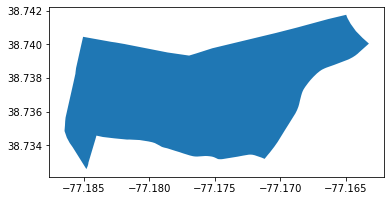

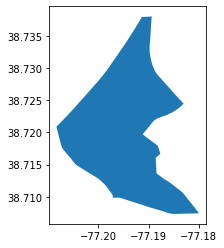

In [125]:
#Example of comparing individual precinct id to test for match
shp[(shp['unique_id'] == '059630')].plot()
final[(final['unique_id_2'] == '059625')].plot()

In [126]:
df_with_absentee_reallocated['unique_id_2'] = df_with_absentee_reallocated['unique_id']
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id'].isin(df_double_list), 'unique_id_2'] = df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id'].isin(df_double_list), 'unique_id_1']
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id'].isin(df_double_list)]

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,vtdst,unique_id,unique_id_1,unique_id_2
88,102.0,202 - Jamestown B,1259.0,1242.0,103.0,8.0,1,James City County,095,095-1,202,095202,095202-1,095202-1
98,113.0,504 - Roberts D,15.0,13.0,1.0,0.0,1,James City County,095,095-1,504,095504,095504-1,095504-1
173,182.0,110 - Buckland Mills,298.0,211.0,11.0,1.0,1,Prince William County,153,153-1,110,153110,153110-1,153110-1
175,184.0,112 - Burke-nickens,41.0,25.0,4.0,0.0,1,Prince William County,153,153-1,112,153112,153112-1,153112-1
183,193.0,210 - Penn,1167.0,714.0,61.0,6.0,1,Prince William County,153,153-1,210,153210,153210-1,153210-1
193,203.0,312 - Triangle,145.0,301.0,27.0,7.0,1,Prince William County,153,153-1,312,153312,153312-1,153312-1
205,216.0,609 - King,0.0,0.0,0.0,0.0,1,Prince William County,153,153-1,609,153609,153609-1,153609-1
215,264.0,103 - Travelers Rest,27.0,17.0,1.0,0.0,1,Spotsylvania County,177,177-1,103,177103,177103-1,177103-1
218,268.0,402 - Parkside,1113.0,965.0,58.0,4.0,1,Spotsylvania County,177,177-1,402,177402,177402-1,177402-1
221,271.0,702 - Brents Mill,729.0,597.0,66.0,2.0,1,Spotsylvania County,177,177-1,702,177702,177702-1,177702-1


In [127]:
#important
# mimmick changes in final file so that can join on unique id later
final['unique_id_2'] = final['unique_id']
final.loc[final['unique_id'].isin(df_double_list), 'unique_id_2'] = final.loc[final['unique_id'].isin(df_double_list), 'unique_id_1']
final.loc[final['unique_id'].isin(df_double_list)]

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G16HORDEM,G16HORREP,G16HORIND,G16HORWRI,geometry,unique_id,unique_id_1,unique_id_2
638,059,Fairfax County,000925,Old Mill,10,926,703,0,5,"POLYGON Z ((-77.47726 38.81506 0.00000, -77.47...",059925,059925-10,059925-10
1688,550,Chesapeake City,000019,Jolliff,4,393,973,0,9,"POLYGON Z ((-76.46335 36.77079 0.00000, -76.46...",550019,550019-4,550019-4
1696,550,Chesapeake City,000045,Sunray II,4,413,262,0,6,"POLYGON Z ((-76.42973 36.76676 0.00000, -76.42...",550045,550045-4,550045-4
1766,650,Hampton City,000215,TYLER (CD 3),3,509,86,0,1,"POLYGON Z ((-76.36283 37.05127 0.00000, -76.36...",650215,650215-3,650215-3
2061,800,Suffolk City,000403,SOUTHSIDE,4,742,98,0,0,"POLYGON Z ((-76.62006 36.71008 0.00000, -76.62...",800403,800403-4,800403-4
2174,550,Chesapeake City,000020,E W Chittum (CD 4),4,797,1289,0,12,"POLYGON Z ((-76.43452 36.81465 0.00000, -76.43...",550020,550020-4,550020-4
2175,550,Chesapeake City,000020,E W Chittum (CD 3),3,1,10,0,1,"MULTIPOLYGON Z (((-76.41226 36.80753 0.00000, ...",550020,550020-3,550020-3
2176,059,Fairfax County,000513,Saint Albans (CD 8),8,421,231,23,0,"POLYGON Z ((-77.17195 38.83980 0.00000, -77.17...",059513,059513-8,059513-8
2177,059,Fairfax County,000513,Saint Albans (CD 11),11,880,0,0,102,"MULTIPOLYGON Z (((-77.17507 38.82548 0.00000, ...",059513,059513-11,059513-11
2180,650,Hampton City,000215,TYLER (CD 2),2,22,11,0,0,"POLYGON Z ((-76.36144 37.05458 0.00000, -76.35...",650215,650215-2,650215-2


In [128]:
shp['unique_id_1'] = shp['unique_id']
shp.loc[shp['unique_id'].isin(merge_dict.keys()), 'unique_id_1'] = shp.loc[shp['unique_id'].isin(merge_dict.keys()), 'unique_id_1'].map(merge_dict)
shp.loc[shp['unique_id'].isin(merge_dict.keys())]

NameError: name 'merge_dict' is not defined

In [321]:
#important
shp = shp.dissolve(by = 'unique_id_1', as_index = False)

In [320]:
df_dict_unique_id = pd.Series(df_with_absentee_reallocated['unique_id_2'].values, index = df_with_absentee_reallocated['unique_id']).to_dict()
shp.loc[shp['unique_id'].isin(df_double_list), 'unique_id_1'] = shp.loc[shp['unique_id'].isin(df_double_list), 'unique_id_1'].map(df_dict_unique_id)
shp.loc[shp['unique_id'].isin(df_double_list)]

,STATEFP,COUNTYFP,VTDST,NAMELSAD,VTDI,LSAD,CHNG_TYPE,ORIG_NAME,ORIG_CODE,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC,geometry,unique_id,unique_id_1
10,51,650,000215,TYLER Voting District,A,V2,None,None,None,None,TYLER,90,N,None,G5240,"POLYGON Z ((-76.36341 37.05190 0.00000, -76.36...",650215,650215-3
7,51,550,000020,E. W. Chittum Voting District,A,V2,None,None,None,None,E. W. Chittum,90,N,None,G5240,"POLYGON Z ((-76.43921 36.80266 0.00000, -76.43...",550020,550020-4
32,51,550,000019,Jolliff Voting District,A,V2,None,None,None,None,Jolliff,90,N,None,G5240,"POLYGON Z ((-76.46335 36.77079 0.00000, -76.46...",550019,550019-4
43,51,550,000045,Sunray II Voting District,A,V2,None,None,None,None,Sunray II,90,N,None,G5240,"POLYGON Z ((-76.42973 36.76676 0.00000, -76.42...",550045,550045-4
0,51,710,000101,Granby Voting District,A,V2,None,None,None,None,Granby,90,N,None,G5240,"POLYGON Z ((-76.29278 36.91614 0.00000, -76.29...",710101,710101-3
3,51,710,000104,Titustown Voting District,A,V2,None,None,None,None,Titustown,90,N,None,G5240,"POLYGON Z ((-76.31892 36.94388 0.00000, -76.31...",710104,710104-3
2,51,177,000103,Travelers Rest Voting District,A,V2,None,None,None,None,Travelers Rest,90,N,None,G5240,"POLYGON Z ((-77.65092 38.16187 0.00000, -77.65...",177103,177103-7
12,51,177,000402,Parkside Voting District,A,V2,None,None,None,None,Parkside,90,N,None,G5240,"POLYGON Z ((-77.53805 38.20530 0.00000, -77.53...",177402,177402-7
23,51,177,000703,Fairview Voting District,A,V2,None,None,None,None,Fairview,90,N,None,G5240,"POLYGON Z ((-77.55333 38.23642 0.00000, -77.55...",177703,177703-7
24,51,177,000704,Gayle Voting District,A,V2,None,None,None,None,Gayle,90,N,None,G5240,"POLYGON Z ((-77.55923 38.23381 0.00000, -77.55...",177704,177704-7


In [129]:
#important
merge_df_list = ['153109-1', #? do not look like they matchPiney Branch
'153106-1', #Westgate part 1 -- on map looks like it this is the only match ?merge
'153106-1', #?merge Westgate part 2 -- westgate is normal Polygon z in final file
 #: 153315 - Williams voting District from shp does not seem to have a match in df
'191702-9', #merge Wallace part 1
'191702-9', #merge Wallace part 2 -- multipolygon in final file - merge shp
'760114-4', #? does not look like it matches based on polygons only one that contains 4 that is not in shp file also??
 #no match in 760 county for : 760215 from shp dataset
 #no match in 750 county for : '750004'
'685003-10', #merge Precint three part 1
'685003-10', #merge Precinct three part 2
 #: 059700 -- no match - in Final and shp, not in df -- zero votes
'095104-2', #merge Berkeley part 1
'095104-2', #merge Berkeley part 2
'161405-6', # merge with exsiting 161405 "North LINDENWOOD" with this "South LINDENWOOD"
'550006-4', # merge Deep creek II -- merge with existing 550006
'550049-4', # merge Waterway II -- merge with exisiting 550049
'041111-4', 
'077401-9',
 '077401-9',

'520004-9',
'520004-9', 
'121203-9'
             ] 

In [130]:
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id_1'].isin(merge_df_list), 'unique_id_2'] = df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id_1'].isin(merge_df_list), 'unique_id_1']
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id_1'].isin(merge_df_list)]

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,vtdst,unique_id,unique_id_1,unique_id_2
169,178.0,106 - Westgate,498.0,1194.0,130.0,11.0,1,Prince William County,153,153-1,106,153106,153106-1,153106-1
172,181.0,109 - Piney Branch,1110.0,1272.0,106.0,10.0,1,Prince William County,153,153-1,109,153109,153109-1,153109-1
295,38.0,104- Berkeley D,456.0,376.0,0.0,0.0,2,James City County,095,095-2,104,095104,095104-2,095104-2
687,9.0,6 - Deep Creek,1755.0,1573.0,0.0,13.0,4,Chesapeake City,550,550-4,006,550006,550006-4,550006-4
707,31.0,49 - Waterway,1881.0,1327.0,0.0,15.0,4,Chesapeake City,550,550-4,049,550049,550049-4,550049-4
728,55.0,111 - Iron Bridge,2007.0,1565.0,0.0,6.0,4,Chesterfield County,041,041-4,111,041111,041111-4,041111-4
846,173.0,114 - One Hundred Fourteen,622.0,1424.0,0.0,13.0,4,Richmond City,760,760-4,114,760114,760114-4,760114-4
1450,153.0,405 - Lindenwood,2129.0,762.0,0.0,1.0,6,Roanoke County,161,161-6,405,161405,161405-6,161405-6
2018,42.0,4 - Fourth Ward,2070.0,655.0,66.0,6.0,9,Bristol City,520,520-9,004,520004,520004-9,520004-9
2123,151.0,401 - Fries,285.0,127.0,20.0,0.0,9,Grayson County,077,077-9,401,077401,077401-9,077401-9


In [131]:
len(set(shp.unique_id_1) - set(df_with_absentee_reallocated['unique_id_2']))

85

In [132]:
shp

,STATEFP,COUNTYFP,VTDST,NAMELSAD,VTDI,LSAD,CHNG_TYPE,ORIG_NAME,ORIG_CODE,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC,geometry,unique_id,unique_id_1
0,51,580,000101,Precinct 1-1,A,00,None,None,None,None,Precinct 1-1,90,N,None,G5240,"POLYGON Z ((-80.00136 37.78983 0.00000, -80.00...",580101,580101
1,51,580,000201,Precinct 2-1,A,00,None,None,None,None,Precinct 2-1,90,N,None,G5240,"POLYGON Z ((-79.99129 37.79115 0.00000, -79.99...",580201,580201
2,51,580,000301,Precinct 3-1,A,00,None,None,None,None,Precinct 3-1,90,N,None,G5240,"POLYGON Z ((-79.99661 37.78701 0.00000, -79.99...",580301,580301
3,51,580,000401,Precinct 4-1,A,00,None,None,None,None,Precinct 4-1,90,N,None,G5240,"POLYGON Z ((-79.99797 37.78069 0.00000, -79.99...",580401,580401
4,51,580,000501,Precinct 5-1,A,00,None,None,None,None,Precinct 5-1,90,N,None,G5240,"POLYGON Z ((-80.00899 37.76259 0.00000, -80.00...",580501,580501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,51,153,000710,Powells Creek Voting District,A,V2,None,None,None,None,Powells Creek,90,N,None,G5240,"POLYGON Z ((-77.30591 38.58793 0.00000, -77.30...",153710,153710
92,51,153,000707,Kilby Voting District,A,V2,None,None,None,None,Kilby,90,N,None,G5240,"POLYGON Z ((-77.28005 38.65520 0.00000, -77.27...",153707,153707
93,51,153,000712,Leesylvania Voting District,A,V2,None,None,None,None,Leesylvania,90,N,None,G5240,"POLYGON Z ((-77.28543 38.59520 0.00000, -77.28...",153712,153712
0,51,530,000001,First Ward,A,00,None,None,None,None,First Ward,90,N,None,G5240,"POLYGON Z ((-79.38080 37.70710 0.00000, -79.38...",530001,530001


# Testing with overlay

In [50]:
overlay['unique_id'] = overlay['COUNTYFP_1'] + overlay['VTDST'].str.slice(start = 3) 

In [133]:
overlay['unique_id'].nunique()

2447

In [134]:
overlay_w_shp = gpd.GeoDataFrame(pd.merge(overlay, shp, on = 'unique_id', how = 'outer'), crs = proj)
overlay_w_shp.shape

<ipython-input-134-7a853ff08c61>:1: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  overlay_w_shp = gpd.GeoDataFrame(pd.merge(overlay, shp, on = 'unique_id', how = 'outer'), crs = proj)


(2469, 60)

In [135]:
overlay_w_shp['geometry'] = overlay_w_shp['geometry_x']
overlay_w_shp.loc[overlay_w_shp['geometry_x'] == None, 'geometry'] = overlay_w_shp.loc[overlay_w_shp['geometry_x'] == None, 'geometry_y']

In [136]:
overlay_w_shp = overlay_w_shp.drop(['geometry_x', 'geometry_y'], axis = 1)

In [137]:
overlay_w_shp['unique_id'].nunique()

2461

In [139]:
final.shape

(2458, 13)

In [140]:
overlay.shape

(2453, 44)

In [141]:
cd.shape

(149, 27)

In [142]:
overlay.CDFP.str.lstrip('0')

0        9
1        9
2        9
3        9
4        9
        ..
2448    11
2449    11
2450    11
2451    11
2452    11
Name: CDFP, Length: 2453, dtype: object

In [143]:
overlay_w_shp['unique_id_1'] = overlay_w_shp['unique_id'] + '-' + overlay_w_shp['CDFP'].str.lstrip('0')

In [144]:
len(set(final.unique_id_1) - set(overlay_w_shp.unique_id_1))

64

In [145]:
overlay_w_shp['unique_id_2'] = overlay_w_shp['unique_id']
overlay_w_shp.loc[overlay_w_shp['unique_id'].isin(df_double_list), 'unique_id_2'] = overlay_w_shp.loc[overlay_w_shp['unique_id'].isin(df_double_list), 'unique_id_1']

In [146]:
len( set(overlay_w_shp.unique_id_2) - set(final.unique_id_2))

52

In [147]:
len(set(df_with_absentee_reallocated.unique_id_2) -  set(overlay_w_shp.unique_id_2) )

65

In [154]:
len( set(overlay_w_shp.unique_id_1) - set(final.unique_id_1))

59

In [155]:
len(set(final.unique_id_1) -  set(overlay_w_shp.unique_id_1))

64

In [152]:
set(df_with_absentee_reallocated.unique_id_1) - set(final.unique_id_1)

{'059925-11', '550019-3', '550045-3', '800403-3'}

In [153]:
df_with_absentee_reallocated[df_with_absentee_reallocated['unique_id_1'].isin(set(df_with_absentee_reallocated.unique_id_1) - set(final.unique_id_1))]

,index,Pct,G16HORREP,G16HORDEM,G16HORIND,G16HORWRI,CON_DIST,LOCALITY,COUNTYFP,countyfp_cd,vtdst,unique_id,unique_id_1,unique_id_2
467,12.0,19 - Jolliff,0.0,0.0,0.0,0.0,3,Chesapeake City,550,550-3,019,550019,550019-3,550019-3
485,32.0,45 - Sunray II,0.0,0.0,0.0,0.0,3,Chesapeake City,550,550-3,045,550045,550045-3,550045-3
667,234.0,403 - Southside,0.0,0.0,0.0,0.0,3,Suffolk City,800,800-3,403,800403,800403-3,800403-3
2719,117.0,925 - Old Mill,0.0,0.0,0.0,0.0,11,Fairfax County,059,059-11,925,059925,059925-11,059925-11


In [157]:
overlay_w_shp.unique_id_1.nunique()

2452

In [158]:
overlay_w_shp.shape

(2469, 60)

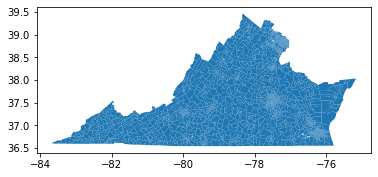

In [159]:
overlay_w_shp['geometry'].plot()

In [160]:
overlay_w_shp.columns

Index(['STATEFP_1', 'COUNTYFP_1', 'CDFP', 'CDTYP', 'NAMELSAD_1', 'LSAD_1',
       'PARTFLG', 'CHNG_TYPE_1', 'EFF_DATE', 'NEW_CODE', 'RELTYPE1',
       'RELTYPE2', 'RELTYPE3', 'RELTYPE4', 'RELTYPE5', 'REL_ENT1', 'REL_ENT2',
       'REL_ENT3', 'REL_ENT4', 'REL_ENT5', 'RELATE_1', 'JUSTIFY_1', 'CDSESSN',
       'NAME_1', 'VINTAGE_1', 'FUNCSTAT_1', 'STATEFP_2', 'COUNTYFP_2',
       'VTDST_x', 'NAMELSAD_2', 'VTDI_x', 'LSAD_2', 'CHNG_TYPE_2',
       'ORIG_NAME_x', 'ORIG_CODE_x', 'RELATE_2', 'NAME_2', 'VINTAGE_2',
       'FUNCSTAT_2', 'JUSTIFY_2', 'MTFCC_x', 'unique_id', 'STATEFP',
       'COUNTYFP', 'VTDST_y', 'NAMELSAD', 'VTDI_y', 'LSAD', 'CHNG_TYPE',
       'ORIG_NAME_y', 'ORIG_CODE_y', 'RELATE', 'NAME', 'VINTAGE', 'FUNCSTAT',
       'JUSTIFY', 'MTFCC_y', 'unique_id_1', 'geometry', 'unique_id_2'],
      dtype='object')

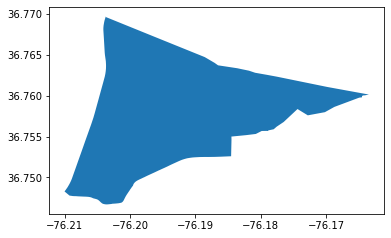

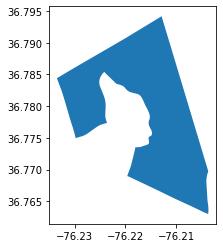

In [162]:
overlay_w_shp['geometry'][(overlay_w_shp['unique_id_2'] == '550065')].plot() #looks like it could be bottom sliver of final id
final[final['unique_id_2'] == '550040'].plot()

In [163]:
overlay_w_shp_to_df_dict = {
    '059925-10': '059925',
    '077011': '077401',
    '077012': '077401',
    '095041': '095104',
    '095042-2': '095104',
    '107422': '107419',
    '153061': '153106',
    '191021': '191702',
    '191022': '191702',
    '520041':  '520004',
    '520042':  '520004',
    '550019-4': '550019',
    '550045-4': '550045',
    '685031': '685003',
    '685032': '685003',
    '800403-4': '800403'
}

In [164]:
overlay_w_shp.loc[overlay_w_shp['unique_id_2'].isin(overlay_w_shp_to_df_dict.keys()), 'unique_id_2'] = overlay_w_shp.loc[overlay_w_shp['unique_id_2'].isin(overlay_w_shp_to_df_dict.keys()), 'unique_id_2'].map(overlay_w_shp_to_df_dict)

In [165]:
overlay_w_shp[overlay_w_shp['unique_id_2'].isin(overlay_w_shp_to_df_dict.keys())]

,STATEFP_1,COUNTYFP_1,CDFP,CDTYP,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,NEW_CODE,...,ORIG_CODE_y,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC_y,unique_id_1,geometry,unique_id_2


In [167]:
len(set(overlay_w_shp.unique_id_2) - set(final.unique_id_2))

45

In [168]:
len(set(final.unique_id_2) - set(overlay_w_shp.unique_id_2))

51

In [ ]:
len(set(overlay_w_shp.unique_id_2) - set(final.unique_id_2))

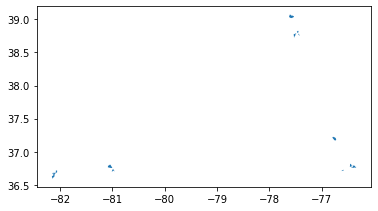

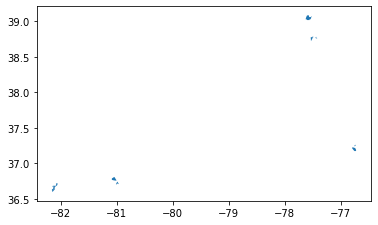

In [173]:
overlay_w_shp['geometry'][overlay_w_shp['unique_id_2'].isin(overlay_w_shp_to_df_dict.values())].plot()
final[final['unique_id_2'].isin(overlay_w_shp_to_df_dict.values())].plot()

In [174]:
len(set(overlay_w_shp['unique_id_2']) - set(final['unique_id_2']))

45

In [175]:
len(set(final['unique_id_2']) - set(overlay_w_shp['unique_id_2']))

51

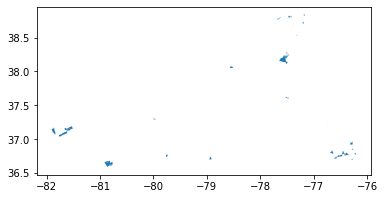

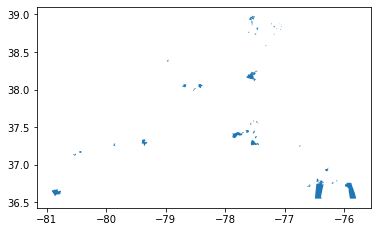

In [176]:
final[final['unique_id_2'].isin(set(final['unique_id_2']) - set(overlay_w_shp['unique_id_2']))].plot()
overlay_w_shp['geometry'][overlay_w_shp['unique_id_2'].isin(set(overlay_w_shp['unique_id_2']) - set(final['unique_id_2']))].plot()

In [130]:
len(set(final.unique_id_1) - set(overlay.unique_id_1))

64

In [133]:
len(set(final.unique_id) - set(overlay.unique_id))

38

In [134]:
final.unique_id.nunique()

2435

In [131]:
len(set(df_with_absentee_reallocated.unique_id_1) - set(overlay.unique_id_1))

68

In [132]:
len(set(overlay.unique_id_1) - set(df_with_absentee_reallocated.unique_id_1))

59

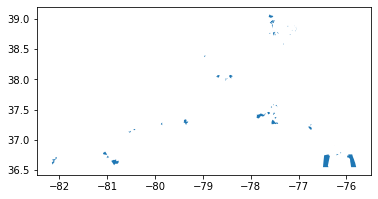

In [136]:
overlay_mismatch = overlay[overlay['unique_id_1'].isin(list(set(overlay.unique_id_1) - set(final.unique_id_1)))]
overlay_mismatch.plot()

In [138]:
set(df_with_absentee_reallocated.unique_id_1) - set(overlay.unique_id_1)

{'003204-5',
 '035403-9',
 '035405-9',
 '041515-7',
 '059203-11',
 '059327-10',
 '059513-11',
 '059513-8',
 '059625-8',
 '059824-11',
 '059854-10',
 '059915-10',
 '059925-11',
 '061301-1',
 '077401-9',
 '083802-5',
 '087104-7',
 '087107-7',
 '087116-7',
 '089304-9',
 '089505-5',
 '095104-2',
 '095202-2',
 '095504-1',
 '107419-10',
 '153106-1',
 '153110-10',
 '153112-1',
 '153210-11',
 '153312-1',
 '153609-1',
 '177103-1',
 '177103-7',
 '177402-1',
 '177402-7',
 '177702-7',
 '177703-1',
 '177704-1',
 '177704-7',
 '185110-9',
 '185111-9',
 '185305-9',
 '185404-9',
 '191702-9',
 '520004-9',
 '550019-3',
 '550020-3',
 '550039-4',
 '550040-3',
 '550045-3',
 '550047-4',
 '650215-2',
 '685003-10',
 '710101-2',
 '710104-2',
 '710104-3',
 '710403-3',
 '710504-2',
 '710511-2',
 '770021-6',
 '800302-3',
 '800403-3',
 '800404-3',
 '800404-4',
 '800504-3',
 '800601-4',
 '800602-3',
 '800602-4'}

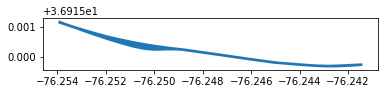

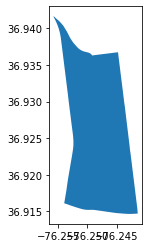

In [141]:
overlay[overlay.unique_id_1 == '710511-3'].plot() #looks like it could be bottom sliver of final id
final[final['unique_id_1'] == '710511-2'].plot()

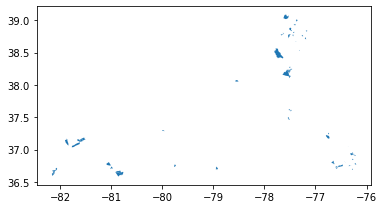

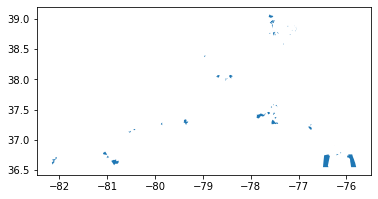

In [145]:
final[final['unique_id_1'].isin(list(set(final.unique_id_1) - set(overlay.unique_id_1)))].plot()
overlay[overlay['unique_id_1'].isin(list(set(overlay.unique_id_1) - set(final.unique_id_1)))].plot()

In [147]:
overlay.unique_id_1.nunique()

2452

In [155]:
set(df_with_absentee_reallocated['unique_id_1']) - set(final['unique_id_1']) 

{'059925-11', '550019-3', '550045-3', '800403-3'}

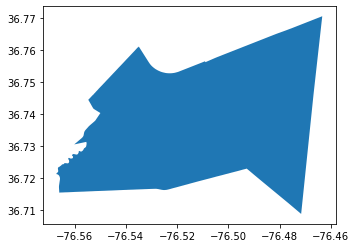

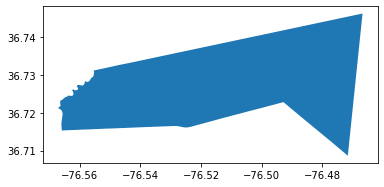

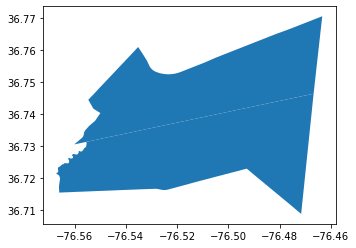

In [178]:
shp[(shp['unique_id'] == '800302')].plot() 
overlay[(overlay['unique_id'] == '800302')].plot() 
final[final['unique_id'] == '800302'].plot()

In [262]:
shp_need_cd_for_match = shp[shp['unique_id'].isin(list(set(shp.unique_id) - set(final.unique_id_2)))]

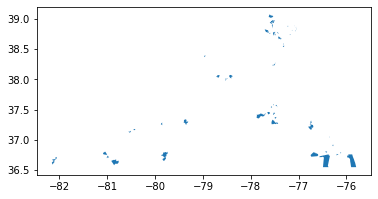

In [265]:
overlay_spec_shp_and_cd = gpd.overlay(cd, shp_need_cd_for_match, how = 'intersection', make_valid = True, keep_geom_type = True)
overlay_spec_shp_and_cd.plot()

In [268]:
overlay_spec_shp_and_cd.head()

,STATEFP_1,COUNTYFP_1,CDFP,CDTYP,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,NEW_CODE,...,ORIG_NAME,ORIG_CODE,RELATE_2,NAME_2,VINTAGE_2,FUNCSTAT_2,JUSTIFY_2,MTFCC,unique_id,geometry
0,51,121,09,O,Congressional District 9,C2,Y,None,None,None,...,None,None,None,B-3 part 2,90,N,None,G5240,121032,"POLYGON Z ((-80.44921 37.16344 0.00000, -80.44..."
1,51,121,09,O,Congressional District 9,C2,Y,None,None,None,...,None,None,None,D-3 part 2,90,N,None,G5240,121032,"POLYGON Z ((-80.51937 37.13193 0.00000, -80.51..."
2,51,750,09,O,Congressional District 9,C2,Y,None,None,None,...,None,None,None,New River Precinct,90,N,None,G5240,750004,"POLYGON Z ((-80.54464 37.14370 0.00000, -80.54..."
3,51,095,02,O,Congressional District 2,C2,Y,None,None,None,...,None,None,None,Roberts D,90,N,None,G5240,095504,"POLYGON Z ((-76.69181 37.21087 0.00000, -76.69..."
4,51,095,02,O,Congressional District 2,C2,Y,None,None,None,...,None,None,None,Berkeley D Part 1,90,S,None,G5240,095041,"POLYGON Z ((-76.72393 37.18125 0.00000, -76.72..."


In [270]:
overlay_spec_shp_and_cd['unique_id_2'] = overlay_spec_shp_and_cd['COUNTYFP_1'] + overlay_spec_shp_and_cd['VTDST'].str.slice(start = 3) + '-' +overlay_spec_shp_and_cd['CDFP'].str.lstrip('0')
overlay_spec_shp_and_cd.head()

,STATEFP_1,COUNTYFP_1,CDFP,CDTYP,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,NEW_CODE,...,ORIG_CODE,RELATE_2,NAME_2,VINTAGE_2,FUNCSTAT_2,JUSTIFY_2,MTFCC,unique_id,geometry,unique_id_2
0,51,121,09,O,Congressional District 9,C2,Y,None,None,None,...,None,None,B-3 part 2,90,N,None,G5240,121032,"POLYGON Z ((-80.44921 37.16344 0.00000, -80.44...",121032-9
1,51,121,09,O,Congressional District 9,C2,Y,None,None,None,...,None,None,D-3 part 2,90,N,None,G5240,121032,"POLYGON Z ((-80.51937 37.13193 0.00000, -80.51...",121032-9
2,51,750,09,O,Congressional District 9,C2,Y,None,None,None,...,None,None,New River Precinct,90,N,None,G5240,750004,"POLYGON Z ((-80.54464 37.14370 0.00000, -80.54...",750004-9
3,51,095,02,O,Congressional District 2,C2,Y,None,None,None,...,None,None,Roberts D,90,N,None,G5240,095504,"POLYGON Z ((-76.69181 37.21087 0.00000, -76.69...",095504-2
4,51,095,02,O,Congressional District 2,C2,Y,None,None,None,...,None,None,Berkeley D Part 1,90,S,None,G5240,095041,"POLYGON Z ((-76.72393 37.18125 0.00000, -76.72...",095041-2


In [275]:
len(set(overlay_spec_shp_and_cd['unique_id_2']) - set(set(final.unique_id_2) - set(shp.unique_id)))

51

## Join election results and shapefile

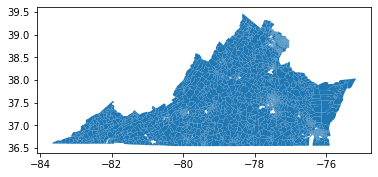

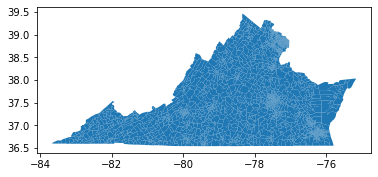

In [183]:
join = gpd.GeoDataFrame(pd.merge(df_with_absentee_reallocated, overlay_w_shp, on = 'unique_id_2', how = 'inner'), crs = proj)
join.plot()
final.plot()

In [184]:
join.shape

(2397, 73)

# Validation

## Shapefile validation

In [146]:
shp_final_merge = pd.merge(join, final, on = 'unique_id_2', how = 'inner', suffixes = ['_x', '_y'])
shp['geometry'].geom_almost_equals(final['geometry'], decimal = 0)

/Users/lilyfalk/anaconda3/lib/python3.8/site-packages/geopandas/base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0       False
0       False
0       False
0       False
0       False
        ...  
2453    False
2454    False
2455    False
2456    False
2457    False
Length: 4676, dtype: bool

In [147]:
shp_shapes = gpd.GeoDataFrame(shp_final_merge, geometry = 'geometry_x')
final_shapes = gpd.GeoDataFrame(shp_final_merge, geometry = 'geometry_y')
vals = shp_shapes.geom_almost_equals(final_shapes, decimal = 0)
print(vals.value_counts())

True     1775
False     647
dtype: int64


059    50
153    41
107    38
550    30
041    24
       ..
169     1
730     1
049     1
680     1
630     1
Name: unique_id, Length: 93, dtype: int64


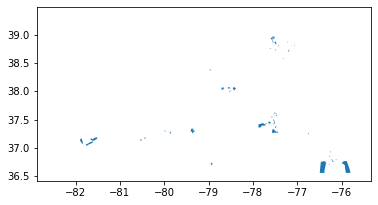

In [148]:
print(shp_final_merge[~vals]['unique_id'].str[0:3].value_counts())
diff_precincts = gpd.GeoDataFrame(shp_final_merge[~vals], geometry = 'geometry_x', crs = proj)

shp_difference = gpd.overlay(shp_shapes, final_shapes, how = 'symmetric_difference')
shp_difference.plot()

     STATEFP COUNTYFP_x VTDST_x                              NAMELSAD VTDI  \
0         51        580  000101                          Precinct 1-1    A   
1         51        580  000201                          Precinct 2-1    A   
2         51        580  000301                          Precinct 3-1    A   
14        51        117  000401  American Legion Hall Voting District    A   
15        51        117  000501            South Hill Voting District    A   
...      ...        ...     ...                                   ...  ...   
2426      51        153  000706                Rippon Voting District    A   
2428      51        153  000709               Freedom Voting District    A   
2431      51        153  000712           Leesylvania Voting District    A   
2432      51        530  000001                            First Ward    A   
2433      51        530  000002                           Second Ward    A   

     LSAD CHNG_TYPE ORIG_NAME ORIG_CODE RELATE  ...            

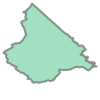

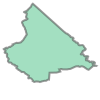

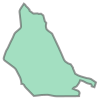

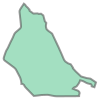

In [193]:
#Show a random difference
test = shp_final_merge[~vals].sample(axis = 0, n=1).index[0]
print(shp_final_merge[~vals])
display(shp_final_merge.iloc[test]['geometry_x'])
display(shp_final_merge.iloc[test]['geometry_y'])

test = shp_final_merge[~vals].sample(axis = 0).index[0]
display(shp_final_merge.iloc[test]['geometry_x'])
display(shp_final_merge.iloc[test]['geometry_y'])

## Precint level election result check

In [177]:
set(df_with_absentee_reallocated.unique_id_1) - set(final.unique_id_1)

{'059925-11', '550019-3', '550045-3', '800403-3'}

In [179]:
final_df_merge = pd.merge(df_with_absentee_reallocated, final, how = 'inner', on = 'unique_id_1')

In [180]:
col_list = ['G16HORREP', 'G16HORDEM', 'G16HORIND', 'G16HORWRI']

In [181]:
#From Peter's MO
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff != 0):
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]['unique_id_1'])
                if (diff>max_diff):
                    max_diff = diff
                    #add line to check percent from total vote difference is
                    perc_diff_from_vest = (diff/df.iloc[j][right_Data])*100
                    print("New max diff is: ", str(max_diff))
                    print('% difference from VEST total is: ', str(perc_diff_from_vest))
                    print(df.iloc[j]['unique_id_1'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]['unique_id_1'])
        else:
            matching_rows +=1
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
        #add line for % of total vote that difference is
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 5")
    diff_list.sort()

In [182]:
validater_row(final_df_merge, col_list)

New max diff is:  1.0
% difference from VEST total is:  0.12285012285012285
033101-1
There are  2457  total rows
1168  of these rows have election result differences
1289  of these rows are the same

The max difference between any one shared column in a row is:  1.0
The average difference is:  1.0
There are  0 precinct results with a difference greater than 5


In [164]:
len(set(overlay_w_shp.unique_id_2) - set(final.unique_id_2))

41

In [165]:
final.unique_id_2.nunique()

2458

In [166]:
final.shape

(2458, 13)

In [186]:
final_join_shp_merge = pd.merge(join, final, how = 'inner', on = 'unique_id_2')

In [187]:
final_join_shp_merge.shape

(2397, 85)

In [188]:
validater_row(final_join_shp_merge, col_list)

New max diff is:  1.0
% difference from VEST total is:  0.12285012285012285
033101-1
There are  2397  total rows
1144  of these rows have election result differences
1253  of these rows are the same

The max difference between any one shared column in a row is:  1.0
The average difference is:  1.0
There are  0 precinct results with a difference greater than 5


In [173]:
final_df_merge_2 = pd.merge(df_with_absentee_reallocated, final, on = 'unique_id_2')

In [174]:
validater_row(final_df_merge_2, col_list)

New max diff is:  1.0
% difference from VEST total is:  0.12285012285012285
033101
New max diff is:  973.0
% difference from VEST total is:  100.0
550019
There are  2461  total rows
1172  of these rows have election result differences
1289  of these rows are the same

The max difference between any one shared column in a row is:  973.0
The average difference is:  4.090971272229822
There are  8 precinct results with a difference greater than 5
